# <font color='blue'>Atividade Machine Learning</font>

# <font color='blue'>Estudando o KNN - Aprendizado Baseado em Instâncias</font>

# 1º Síntese sobre o KNN com Séries Temporais

As séries temporais são um dos tipos mais comuns de dados sequenciais e consistem em observações ao longo do tempo. 

O KNN é um dos algoritmos de aprendizado supervisionado do paradigma baseado em exemplos que visa encontrar,
segundo alguma medida de similaridade, os k exemplos mais próximos de um exemplo ainda não rotulado e,
baseado nos rótulos desses k exemplos próximos, rotular o novo exemplo.


Assim, se k=1 o novo exemplo será classificado como pertencente à mesma classe do único exemplo mais
próximo de acordo com a medida de similaridade. 
Diferentemente, se forem considerados k > 1 vizinhos, por exemplo, k = 3, a classe predominantes dos três exemplos mais próximos será atribuída ao novo exemplo. 

Portanto, verifica-se que o valor do parâmetro k é particular a cada problema e estimá-lo incide em uma tarefa delicada que merece especial atenção, o valor de k determinará como o novo exemplo será classificado.

O algoritmo KNN aplicado em séries temporais, é uma modificação do KNN original, essa adaptação permite realizar a predição de valores futuros com base na exploração das observações da série histórica.

# 2º Selecionando o Dataset

In [19]:
import h5py
import numpy as np
import pandas as pd

dataset = pd.read_csv('cleanDS.csv')

# 3º Explorando os Dados

In [20]:
dataset

,cpf,sexo,salario,estado,poupanca,altura,peso,total.emprestimo,financiamento
0,741132012,M,5124.00,MA,-1000.00,1.93,85.62,0.00,S
1,246313939,F,4772.45,SP,15012.90,1.84,99.12,NaN,S
2,431872706,F,5001.80,BA,0.00,1.66,104.39,0.00,N
3,127070574,F,5279.32,DF,0.00,1.73,72.57,0.00,S
4,620680270,M,5327.52,RS,8172.68,2.05,97.89,0.00,S
...,...,...,...,...,...,...,...,...,...
205,132343102,M,4610.80,SC,15116.02,1.62,103.20,461.08,N
206,792789534,M,5489.12,RN,14428.67,1.44,56.38,0.00,N
207,813971610,M,4525.37,PB,-1000.00,1.56,129.89,452.54,N
208,839747002,M,4297.15,MA,5542.76,2.10,106.36,0.00,N


# 4º Preparando os Dados

# 5º Modelagem dos Dados

# 6º Avaliação dos Dados

# 7º Deploy

In [2]:
# Carrega os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.decomposition
import sklearn.model_selection
import sklearn.neighbors
import sklearn.metrics

In [3]:
# Gera o dataset
digitos = sklearn.datasets.load_digits()

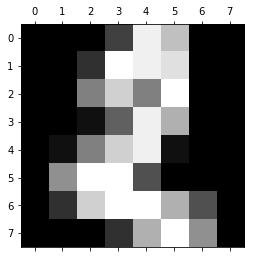

In [4]:
# Plot de um dos itens do dataset
plt.gray() 
plt.matshow(digitos.images[2]) 
plt.show() 

In [5]:
# Gera X e Y
X = digitos.data
Y = digitos.target

In [6]:
# Formato de X e Y
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [7]:
# Cross Validation para gerar os datasets de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = sklearn.model_selection.train_test_split (X, Y, 
                                                                                  test_size = 0.33, 
                                                                                  random_state = 101)

In [8]:
# Normalização dos dados pela Média

# Cálculo da média do dataset de treino
X_norm = np.mean(X_treino, axis = 0)

# Normalização dos dados de treino e de teste
X_treino_norm = X_treino - X_norm
X_teste_norm = X_teste - X_norm

In [9]:
# Shape dos datasets
print(X_treino_norm.shape, X_teste_norm.shape, Y_treino.shape, Y_teste.shape)

(1203, 64) (594, 64) (1203,) (594,)


In [10]:
# Single Value Decompositon (SVD) - Redução de Dimensionalidade
# Redução de Componentes Linear, similar ao PCA
svd = sklearn.decomposition.TruncatedSVD(n_components = 2)
X_2d = svd.fit_transform(X_treino_norm)

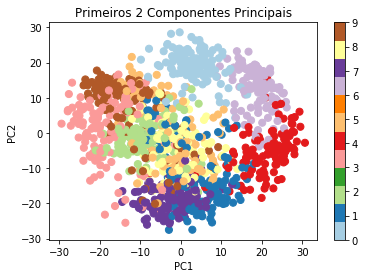

In [11]:
# Plot dos 2 primeiros Componentes Principais
plt.scatter(X_2d[:,0], X_2d[:,1], c = Y_treino, s = 50, cmap = plt.cm.Paired)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Primeiros 2 Componentes Principais')
plt.show()

In [12]:
# Função para testar o melhor valor de K
def compute_teste (x_teste, y_teste, clf, cv):
    KFolds = sklearn.model_selection.KFold(n_splits = cv)
    
    scores = []
    
    for i, j in KFolds.split(x_teste):
        test_set = x_teste[j]
        test_labels = y_teste[j]
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(test_set)))
    return scores

In [13]:
# Definição de parâmetros
k = np.arange(20) + 1
parametros = {'n_neighbors':k}

In [14]:
# Construção do Modelo KNN
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
modelo = sklearn.neighbors.KNeighborsClassifier()

In [15]:
modelo.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>

In [16]:
# Grid Search para Cross Validation com o melhor valor de K
modeloKNN = sklearn.model_selection.GridSearchCV(modelo, parametros, cv = 10)

In [17]:
modeloKNN.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)>

In [18]:
# Listas vazias que vão receber os scrores de acurária e os parâmetros resultados do modelo
acuracia = []
params = []

In [19]:
# Lista de dimensões
dimensoes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [20]:
# Implementação do modelo
for d in dimensoes:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d < 64:
        X_fit_treino = svd.fit_transform(X_treino)
        X_fit_teste = svd.transform(X_teste)
    else:
        X_nl = X_treino
        X_nl1 = X_teste
        
    modeloKNN.fit(X_fit_treino, Y_treino)
    
    acuracia.append(compute_teste(x_teste = X_fit_teste, y_teste = Y_teste, clf = modeloKNN, cv = 10))
    params.append(modeloKNN.best_params_['n_neighbors'])

In [21]:
# A acurácia aumenta à medida que usamos mais dimensões para o modelo de classificação
acuracia

[[0.18333333333333332,
  0.083333333333333329,
  0.16666666666666666,
  0.13333333333333333,
  0.1864406779661017,
  0.10169491525423729,
  0.13559322033898305,
  0.10169491525423729,
  0.067796610169491525,
  0.15254237288135594],
 [0.48333333333333334,
  0.40000000000000002,
  0.41666666666666669,
  0.31666666666666665,
  0.38983050847457629,
  0.40677966101694918,
  0.4576271186440678,
  0.5423728813559322,
  0.30508474576271188,
  0.38983050847457629],
 [0.68333333333333335,
  0.68333333333333335,
  0.6333333333333333,
  0.66666666666666663,
  0.61016949152542377,
  0.57627118644067798,
  0.74576271186440679,
  0.67796610169491522,
  0.61016949152542377,
  0.64406779661016944],
 [0.81666666666666665,
  0.81666666666666665,
  0.75,
  0.76666666666666672,
  0.76271186440677963,
  0.72881355932203384,
  0.86440677966101698,
  0.84745762711864403,
  0.69491525423728817,
  0.81355932203389836],
 [0.91666666666666663,
  0.84999999999999998,
  0.83333333333333337,
  0.8666666666666667,
  

## Alterando Parâmetros do Modelo

In [22]:
# Alterando parâmetros do modelo
modelo_v2 = sklearn.neighbors.KNeighborsClassifier(metric = 'hamming')
modeloKNN_v2 = sklearn.model_selection.GridSearchCV(modeloKNN, parametros, cv = 10)

In [23]:
modelo_v2.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>

In [24]:
# Listas vazias que vão receber os scrores de acurária e os parâmetros resultados do modelo
acuracia = []
params = []

# Lista de dimensões
dimensoes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
# Implementação do modelo
for d in dimensoes:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d < 64:
        X_fit_treino = svd.fit_transform(X_treino)
        X_fit_teste = svd.transform(X_teste)
    else:
        X_nl = X_treino
        X_nl1 = X_teste
        
    modelo_v2.fit(X_fit_treino, Y_treino)
    
    acuracia.append(compute_teste(x_teste = X_fit_teste, y_teste = Y_teste, clf = modelo_v2, cv = 10))

In [26]:
acuracia

[[0.18333333333333332,
  0.083333333333333329,
  0.13333333333333333,
  0.13333333333333333,
  0.050847457627118647,
  0.084745762711864403,
  0.067796610169491525,
  0.10169491525423729,
  0.084745762711864403,
  0.067796610169491525],
 [0.083333333333333329,
  0.050000000000000003,
  0.13333333333333333,
  0.13333333333333333,
  0.10169491525423729,
  0.050847457627118647,
  0.067796610169491525,
  0.10169491525423729,
  0.067796610169491525,
  0.10169491525423729],
 [0.18333333333333332,
  0.083333333333333329,
  0.13333333333333333,
  0.13333333333333333,
  0.050847457627118647,
  0.084745762711864403,
  0.067796610169491525,
  0.10169491525423729,
  0.084745762711864403,
  0.067796610169491525],
 [0.18333333333333332,
  0.083333333333333329,
  0.13333333333333333,
  0.13333333333333333,
  0.050847457627118647,
  0.084745762711864403,
  0.067796610169491525,
  0.10169491525423729,
  0.084745762711864403,
  0.067796610169491525],
 [0.083333333333333329,
  0.050000000000000003,
  0.1

# Fim